**Projeto 1**
Teoria e Aplicação de Grafos, Turma 01, 2025/1

Participantes:
- Danilo Silveira da Silva: 222014142
- Luana Pinho Torres: 222011623

In [ ]:
# Instalndo as bibliotecas necessárias para rodar o projeto
%pip install networkx
%pip install matplotlib
%pip install scipy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: networkx in c:\users\danilo\appdata\local\programs\python\python310\lib\site-packages (3.4.2)




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Importações do projeto
import os
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

In [4]:
def criar_grafo_interacoes():
    """
    Função que cria um grafo direcionado a partir dos dados de interações no Twitter,
    onde os usuários são nós e as interações (retweets/menções) são as arestas.
    """
    caminho = 'SNAP/Twitter'  # Caminho onde estão os arquivos de dados
    contador_arestas = defaultdict(int)  # Contador de arestas (interações)

    # Obter todos os arquivos com extensão .edges e o arquivo twitter_combined.txt
    arquivos_edges = [os.path.join(caminho, arq) 
                     for arq in os.listdir(caminho) 
                     if arq.endswith('.edges')]
    arquivos_edges.append(os.path.join('SNAP', 'twitter_combined.txt'))

    # Ler os arquivos e processar as interações
    for caminho_arquivo in arquivos_edges:
        try:
            with open(caminho_arquivo, 'r') as arquivo:
                for linha in arquivo:
                    linha = linha.strip()
                    if not linha:
                        continue
                    
                    nos = linha.split()  # Dividir cada linha em dois nós
                    if len(nos) != 2:
                        continue
                    
                    origem, destino = nos  # Definir os nós origem e destino
                    contador_arestas[(origem, destino)] += 1  # Contar as interações
        except FileNotFoundError:
            print(f"Arquivo não encontrado: {caminho_arquivo}")
            continue
    
    # Criar o grafo direcionado
    G = nx.DiGraph()
    for (origem, destino), peso in contador_arestas.items():
        G.add_edge(origem, destino, weight=peso)  # Adicionar as arestas com peso
    
    return G

# Caminho para salvar o grafo
saida = 'grafo_interacoes.gexf'

# Criar o grafo
grafo = criar_grafo_interacoes()

# Salvar o grafo no formato GEXF
nx.write_gexf(grafo, saida)

# Imprimir informações sobre o grafo criado
print(f"Grafo criado com sucesso!")
print(f"Número de nós: {len(grafo.nodes())}")
print(f"Número de arestas: {len(grafo.edges())}")
print(f"Arquivo salvo como: {saida}")

Grafo criado com sucesso!
Número de nós: 81306
Número de arestas: 1768149
Arquivo salvo como: grafo_interacoes.gexf


In [5]:
def extrair_subgrafo_por_no(arquivo_grafo, alvo, arquivo_subgrafo):
    """
    Extrai um subgrafo de um grafo carregado a partir de um arquivo GEXF, 
    contendo o nó alvo e seus vizinhos diretos. O subgrafo é salvo em um novo arquivo GEXF.
    
    Parâmetros:
    arquivo_grafo (str): Caminho do arquivo GEXF que contém o grafo principal.
    alvo (str): Identificador do nó alvo do qual se deseja extrair o subgrafo.
    arquivo_subgrafo (str): Caminho do arquivo GEXF onde o subgrafo será salvo.
    
    Retorna:
    None: Salva o subgrafo em um arquivo GEXF e imprime o número de nós e arestas.
    """
    try:
        # Carregar o grafo do arquivo GEXF
        G = nx.read_gexf(arquivo_grafo)

        # Verificar se o nó alvo existe no grafo
        if alvo in G:
            # Obter os vizinhos do nó alvo
            vizinhos = list(G.neighbors(alvo))
            # Criar o subgrafo com os vizinhos
            subgrafo = G.subgraph(vizinhos)
            # Salvar o subgrafo em um novo arquivo GEXF
            nx.write_gexf(subgrafo, arquivo_subgrafo)
            print(f"Subgrafo com {subgrafo.number_of_nodes()} nós e {subgrafo.number_of_edges()} arestas salvo como '{arquivo_subgrafo}'.")

        else:
            print(f"O nó '{alvo}' não existe no grafo.")

    except Exception as e:
        print(f"Erro ao processar o grafo: {e}")

extrair_subgrafo_por_no("grafo_interacoes.gexf", "158419434", "alvo_subgrafo.gexf")

Subgrafo com 195 nós e 7201 arestas salvo como 'alvo_subgrafo.gexf'.


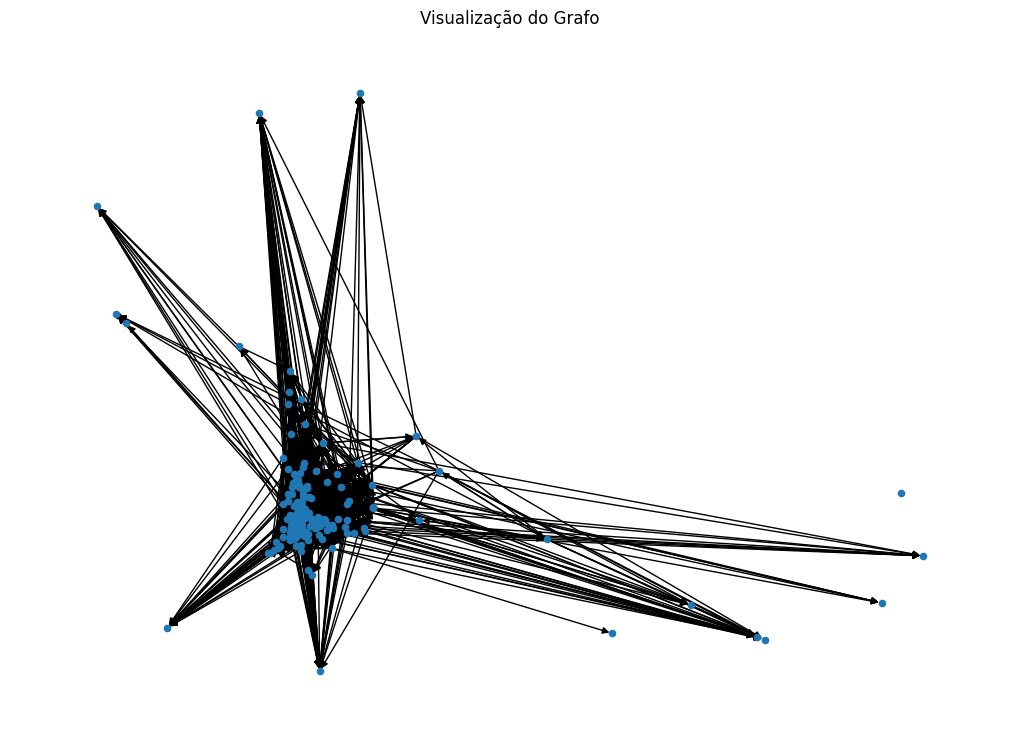

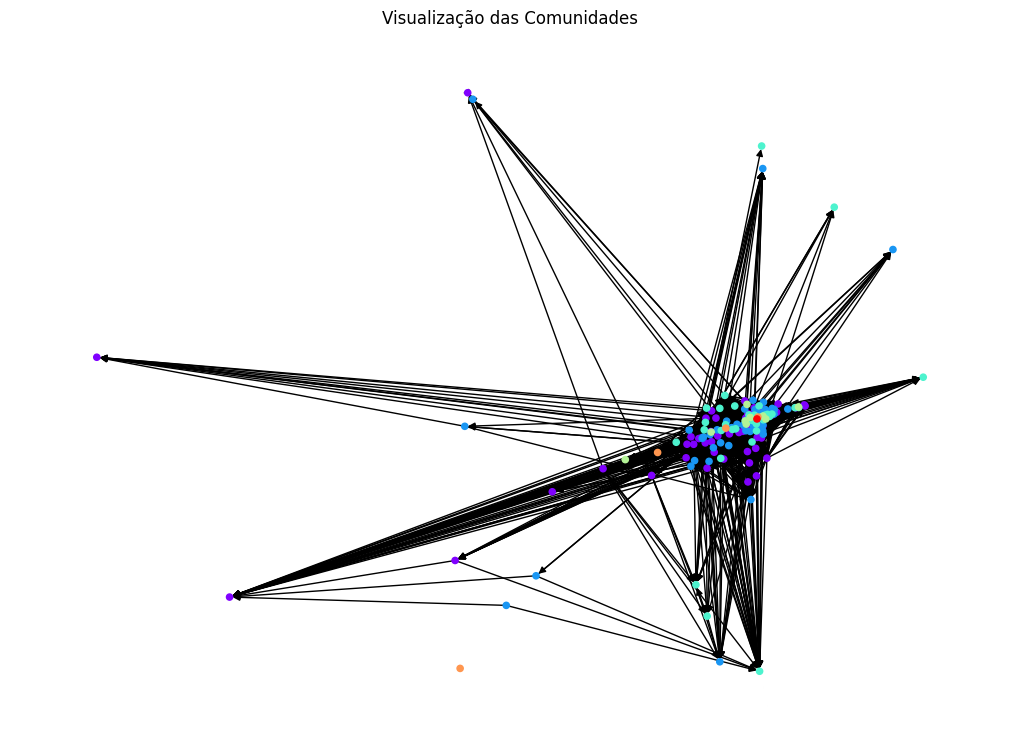

Top 10 nós mais influentes com base no PageRank:
Nó: 40981798, PageRank: 0.0595
Nó: 43003845, PageRank: 0.0556
Nó: 22462180, PageRank: 0.0547
Nó: 34428380, PageRank: 0.0537
Nó: 27633075, PageRank: 0.0332
Nó: 8088112, PageRank: 0.0312
Nó: 31331740, PageRank: 0.0312
Nó: 17868918, PageRank: 0.0294
Nó: 133055665, PageRank: 0.0269
Nó: 117674417, PageRank: 0.0249


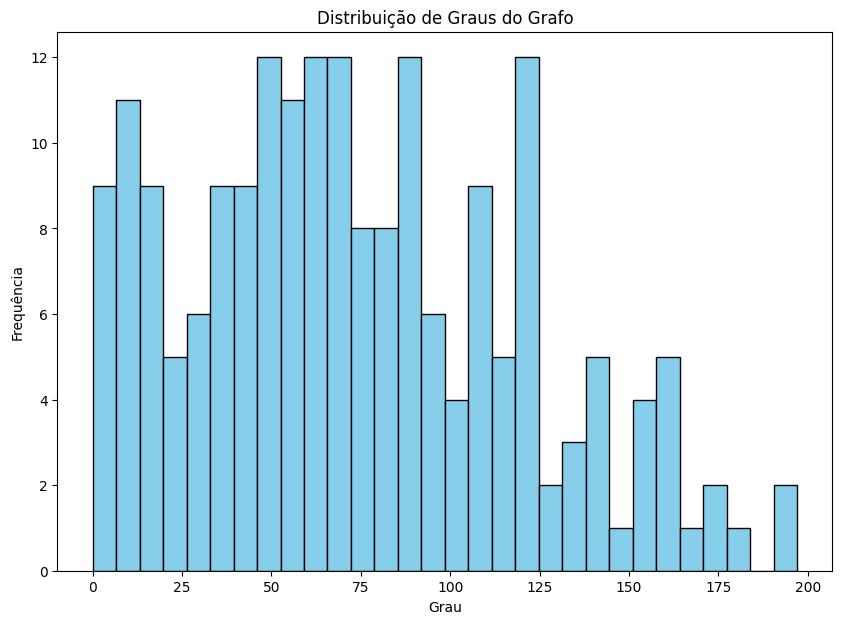


Top 10 nós mais centrais com base no Grau de Centralidade:
Nó: 43003845, Grau de Centralidade: 1.0155
Nó: 40981798, Grau de Centralidade: 1.0000
Nó: 100318079, Grau de Centralidade: 0.9330
Nó: 208132323, Grau de Centralidade: 0.8918
Nó: 276706356, Grau de Centralidade: 0.8814
Nó: 88323281, Grau de Centralidade: 0.8711
Nó: 307458983, Grau de Centralidade: 0.8454
Nó: 22462180, Grau de Centralidade: 0.8454
Nó: 440963134, Grau de Centralidade: 0.8402
Nó: 195475105, Grau de Centralidade: 0.8299

Top 10 nós mais centrais com base na Conexão de Centralidade:
Nó: 40981798, Conexão de Centralidade: 0.0439
Nó: 43003845, Conexão de Centralidade: 0.0430
Nó: 230245985, Conexão de Centralidade: 0.0335
Nó: 88323281, Conexão de Centralidade: 0.0324
Nó: 100318079, Conexão de Centralidade: 0.0324
Nó: 307458983, Conexão de Centralidade: 0.0315
Nó: 2367911, Conexão de Centralidade: 0.0242
Nó: 276706356, Conexão de Centralidade: 0.0220
Nó: 195475105, Conexão de Centralidade: 0.0216
Nó: 461410856, Conexão 

In [15]:
def analisar_grafo_completo(arquivo_grafo):
    """
    Função que realiza a análise de PageRank, detecção de comunidades, 
    e cálculo de medidas de centralidade para identificar espalhadores de desinformação.
    
    Parâmetros:
    arquivo_grafo (str): Caminho do arquivo GEXF contendo o grafo a ser analisado.
    
    Retorna:
    dict: Dicionário contendo os valores de PageRank para cada nó do grafo.
    """
    try:
        # Carregar o grafo do arquivo GEXF
        G = nx.read_gexf(arquivo_grafo)

        # 1. Calcular o PageRank
        pagerank = nx.pagerank(G, alpha=0.85)
        
        # 2. Detectar as comunidades usando o algoritmo de modularidade
        communities = list(greedy_modularity_communities(G))

        # 3. Medidas de Centralidade
        # a. Grau de Centralidade
        grau_centralidade = nx.degree_centrality(G)

        # b. Conexão de Centralidade (betweenness centrality)
        conexao_centralidade = nx.betweenness_centrality(G)

        # c. Proximidade de Centralidade
        proximidade_centralidade = nx.closeness_centrality(G)

        # Visualização do grafo completo
        plt.figure(figsize=(10, 7))
        nx.draw(G, with_labels=False, node_size=20)
        plt.title("Visualização do Grafo")
        plt.show()

        # Visualização das comunidades detectadas
        plt.figure(figsize=(10, 7))
        community_colors = [i for i in range(len(communities)) for _ in communities[i]]
        nx.draw(G, node_color=community_colors, with_labels=False, node_size=20, cmap=plt.cm.rainbow)
        plt.title("Visualização das Comunidades")
        plt.show()

        # Plotando o PageRank para os nós
        nodes_sorted_by_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
        top_nodes = nodes_sorted_by_pagerank[:10]  # Pegando os 10 principais nós com maior PageRank

        print("Top 10 nós mais influentes com base no PageRank:")
        for node, score in top_nodes:
            print(f"Nó: {node}, PageRank: {score:.4f}")
        
        # 4. Plotar a distribuição de grau
        graus = [G.degree(n) for n in G.nodes()]
        plt.figure(figsize=(10, 7))
        plt.hist(graus, bins=30, color='skyblue', edgecolor='black')
        plt.title('Distribuição de Graus do Grafo')
        plt.xlabel('Grau')
        plt.ylabel('Frequência')
        plt.show()

        # 5. Exibir as medidas de centralidade
        print("\nTop 10 nós mais centrais com base no Grau de Centralidade:")
        for node, score in sorted(grau_centralidade.items(), key=lambda x: x[1], reverse=True)[:10]:
            print(f"Nó: {node}, Grau de Centralidade: {score:.4f}")

        print("\nTop 10 nós mais centrais com base na Conexão de Centralidade:")
        for node, score in sorted(conexao_centralidade.items(), key=lambda x: x[1], reverse=True)[:10]:
            print(f"Nó: {node}, Conexão de Centralidade: {score:.4f}")

        print("\nTop 10 nós mais centrais com base na Proximidade de Centralidade:")
        for node, score in sorted(proximidade_centralidade.items(), key=lambda x: x[1], reverse=True)[:10]:
            print(f"Nó: {node}, Proximidade de Centralidade: {score:.4f}")

        # Retornar o dicionário de PageRank
        return pagerank

    except Exception as e:
        print(f"Erro ao processar o grafo: {e}")

pagerank_resultado = analisar_grafo_completo("alvo_subgrafo.gexf")
